# CollegeForum Dataset

Similar to the [CollegeMsg](http://snap.stanford.edu/data/CollegeMsg.html) dataset, this dataset contains the messages between students on forums (vs direct messages in CollegeMsg) on a social network of a University California Irvine.

This dataset downloaded from: https://toreopsahl.com/datasets/#online_social_network

---

Import libs

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

import os

import pandas as pd

---

Set dataset input path

In [6]:
INPUT_DIR = '../../../data/CollegeForum/'
INPUT_PATH = '../../../data/CollegeForum/OF_longitudinal_weightedchar.txt'

Parse the dataset

In [7]:
df = pd.read_csv(INPUT_PATH, sep=' ', names=['date', 'src', 'dst', 'weightedchar'])
df['date'] = pd.to_datetime(df['date'])
df['time'] = df['date'].values.astype(np.int64) // (10 ** 9)
df = df[['src', 'dst', 'weightedchar', 'date', 'time']]
df

,src,dst,weightedchar,date,time
0,201,3,23,2004-05-14 20:53:16,1084567996
1,187,3,63,2004-05-14 20:54:08,1084568048
2,138,2,6,2004-05-14 20:55:40,1084568140
3,345,3,38,2004-05-14 21:00:04,1084568404
4,233,3,60,2004-05-14 21:02:17,1084568537
...,...,...,...,...,...
33715,719,20,143,2004-10-26 01:51:33,1098755493
33716,719,107,231,2004-10-26 01:58:17,1098755897
33717,625,59,51,2004-10-26 02:35:18,1098758118
33718,375,266,28,2004-10-26 08:40:22,1098780022


In [8]:
# Save with header
df.to_csv(os.path.join(INPUT_DIR, 'CollegeForum-withHeader.csv'), header=True, index=False)
# Save without header in correct format to build dataset
df.to_csv(os.path.join(INPUT_DIR, 'CollegeForum.csv.gz'), header=False, index=False, compression='gzip')

---

Build dataset

In [14]:
from tsvar.preprocessing import Dataset

In [15]:
dataset = Dataset(os.path.join(INPUT_DIR, 'CollegeForum.csv.gz'), top=100, timescale='median', verbose=True)

In [16]:
start_time = min(map(min, dataset.timestamps))
dataset.timestamps = [ev - start_time for ev in dataset.timestamps]
dataset.end_time = max(map(max, dataset.timestamps))

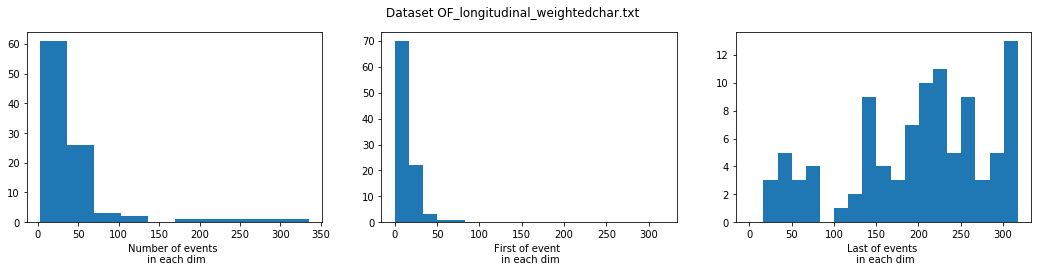

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 3.5))

axs[0].hist(list(map(len, dataset.timestamps)))
axs[0].set_xlabel('Number of events \n in each dim')

end_time = dataset.end_time
axs[1].hist(list(map(min, dataset.timestamps)), bins=np.linspace(0, end_time, 20))
axs[1].set_xlabel('First of event \n in each dim')

axs[2].hist(list(map(max, dataset.timestamps)), bins=np.linspace(0, end_time, 20))
axs[2].set_xlabel('Last of events \n in each dim')

fig.suptitle(f"Dataset {os.path.split(INPUT_PATH)[1]}");

---

In [18]:
import pickle
with open(os.path.join(INPUT_DIR, 'dataset-collegeForum.pk'), 'wb') as f:
    pickle.dump(dataset, f)